In [1]:
%pylab inline
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from IPython import display
rcParams.update({'figure.max_open_warning': 0})
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [2]:
def derivs(t, y, nu, xs,K,koff,a0):
    x0 = y[0]               # position of hub
    N = int(0.5*(len(y)-1))   # of lattice sites
    Ac = y[1:N+1]          # bound complex on lattice
    As = y[-N:]             # unbound complex on lattice
    
    dxdt = integrate.trapz(-(x0-xs)*Ac, x=xs)
    binding = exp(-0.5*(x0-xs)**2)*As 
    burnt = nu*Ac
    rebinding = koff/(1+K)*a0-koff*As

    dAcdt = (binding - burnt)
    dAsdt = -binding +rebinding
    
    return array( [dxdt] + list(dAcdt) + list(dAsdt))

In [3]:
# define event as having gone to x = 20.0
def event(t, y):
    x0 = y[0]
        
    return 20.0-x0

event.direction = 0        
event.terminal = True     # stop solver if event satisfied

In [4]:
# use solve_ivp to find solution from t0=0 up to a max tf= 400, but stop if x hits x=20.0

tf = 500.0

dG = 4
K = exp(-dG)
koff = K

a0s = logspace(-2,2,41, base = 10)
a0_n = len(a0s)
nus = logspace(-2,2,41, base = 10)
nu_n = len(nus)

# define domain and lattice
Lmax = 30.0
Lmin = -5.0
dx = 0.1
Nx = int((Lmax-Lmin)/dx) +1
xs = linspace(Lmin, Lmax, Nx)

print(a0s,nus)

[1.00000000e-02 1.25892541e-02 1.58489319e-02 1.99526231e-02
 2.51188643e-02 3.16227766e-02 3.98107171e-02 5.01187234e-02
 6.30957344e-02 7.94328235e-02 1.00000000e-01 1.25892541e-01
 1.58489319e-01 1.99526231e-01 2.51188643e-01 3.16227766e-01
 3.98107171e-01 5.01187234e-01 6.30957344e-01 7.94328235e-01
 1.00000000e+00 1.25892541e+00 1.58489319e+00 1.99526231e+00
 2.51188643e+00 3.16227766e+00 3.98107171e+00 5.01187234e+00
 6.30957344e+00 7.94328235e+00 1.00000000e+01 1.25892541e+01
 1.58489319e+01 1.99526231e+01 2.51188643e+01 3.16227766e+01
 3.98107171e+01 5.01187234e+01 6.30957344e+01 7.94328235e+01
 1.00000000e+02] [1.00000000e-02 1.25892541e-02 1.58489319e-02 1.99526231e-02
 2.51188643e-02 3.16227766e-02 3.98107171e-02 5.01187234e-02
 6.30957344e-02 7.94328235e-02 1.00000000e-01 1.25892541e-01
 1.58489319e-01 1.99526231e-01 2.51188643e-01 3.16227766e-01
 3.98107171e-01 5.01187234e-01 6.30957344e-01 7.94328235e-01
 1.00000000e+00 1.25892541e+00 1.58489319e+00 1.99526231e+00
 2.5118

In [5]:

#I.C.

vs = []  # record final speed and burn rate
burnt = []
A = []


for a0 in a0s:
    astdy = a0/(1+koff)
    A0x = linspace(astdy,-astdy*5, Nx)
    A0x[xs>=0.0] = astdy

    # iterate over params
    vtmp = []
    btmp = []
    Atmp = []
    for nu in nus:
        print(a0, nu)

        x0 = 0.0
        Ax = 1.0*A0x
        Acx = zeros(Nx)

        # initial conditions for all the equations, y0
        y0 = array([x0] + list(Acx) + list(Ax))

        sol = integrate.solve_ivp(lambda t, y: derivs(t, y, nu, xs,K,koff,a0), (0., tf), y0, events=[event], method='BDF')

        speed = derivs(sol.t[-1], sol.y[:,-1], nu, xs,K,koff,a0)[0]  #dx/dt
        vtmp.append(speed)

        Acxf = sol.y[1:1+Nx,-1]  # final amount of complex
        btot = integrate.trapz(nu*Acxf, x=xs)    # total rate of burnt at final time 
        btmp.append(btot)
        Atmp.append(sol.y[1:])
        
    vs.append(vtmp)
    burnt.append(btmp)
    A.append(Atmp)
vs = array(vs)
burnt = array(burnt)

0.01 0.01
0.01 0.012589254117941675
0.01 0.015848931924611134
0.01 0.0199526231496888
0.01 0.025118864315095794
0.01 0.03162277660168379
0.01 0.039810717055349734
0.01 0.05011872336272725
0.01 0.06309573444801933
0.01 0.07943282347242814
0.01 0.1
0.01 0.12589254117941676
0.01 0.15848931924611143
0.01 0.19952623149688797
0.01 0.25118864315095807
0.01 0.31622776601683794
0.01 0.3981071705534973
0.01 0.5011872336272725
0.01 0.6309573444801934
0.01 0.7943282347242817
0.01 1.0
0.01 1.2589254117941675
0.01 1.584893192461114
0.01 1.9952623149688808
0.01 2.5118864315095824
0.01 3.1622776601683795
0.01 3.981071705534973
0.01 5.011872336272725
0.01 6.309573444801936
0.01 7.943282347242821
0.01 10.0
0.01 12.589254117941675
0.01 15.848931924611142
0.01 19.952623149688808
0.01 25.11886431509582
0.01 31.622776601683793
0.01 39.810717055349734
0.01 50.11872336272725
0.01 63.095734448019364
0.01 79.43282347242821
0.01 100.0
0.012589254117941675 0.01
0.012589254117941675 0.012589254117941675
0.01258925

0.03162277660168379 6.309573444801936
0.03162277660168379 7.943282347242821
0.03162277660168379 10.0
0.03162277660168379 12.589254117941675
0.03162277660168379 15.848931924611142
0.03162277660168379 19.952623149688808
0.03162277660168379 25.11886431509582
0.03162277660168379 31.622776601683793
0.03162277660168379 39.810717055349734
0.03162277660168379 50.11872336272725
0.03162277660168379 63.095734448019364
0.03162277660168379 79.43282347242821
0.03162277660168379 100.0
0.039810717055349734 0.01
0.039810717055349734 0.012589254117941675
0.039810717055349734 0.015848931924611134
0.039810717055349734 0.0199526231496888
0.039810717055349734 0.025118864315095794
0.039810717055349734 0.03162277660168379
0.039810717055349734 0.039810717055349734
0.039810717055349734 0.05011872336272725
0.039810717055349734 0.06309573444801933
0.039810717055349734 0.07943282347242814
0.039810717055349734 0.1
0.039810717055349734 0.12589254117941676
0.039810717055349734 0.15848931924611143
0.039810717055349734

0.12589254117941676 0.5011872336272725
0.12589254117941676 0.6309573444801934
0.12589254117941676 0.7943282347242817
0.12589254117941676 1.0
0.12589254117941676 1.2589254117941675
0.12589254117941676 1.584893192461114
0.12589254117941676 1.9952623149688808
0.12589254117941676 2.5118864315095824
0.12589254117941676 3.1622776601683795
0.12589254117941676 3.981071705534973
0.12589254117941676 5.011872336272725
0.12589254117941676 6.309573444801936
0.12589254117941676 7.943282347242821
0.12589254117941676 10.0
0.12589254117941676 12.589254117941675
0.12589254117941676 15.848931924611142
0.12589254117941676 19.952623149688808
0.12589254117941676 25.11886431509582
0.12589254117941676 31.622776601683793
0.12589254117941676 39.810717055349734
0.12589254117941676 50.11872336272725
0.12589254117941676 63.095734448019364
0.12589254117941676 79.43282347242821
0.12589254117941676 100.0
0.15848931924611143 0.01
0.15848931924611143 0.012589254117941675
0.15848931924611143 0.015848931924611134
0.15848

0.3981071705534973 15.848931924611142
0.3981071705534973 19.952623149688808
0.3981071705534973 25.11886431509582
0.3981071705534973 31.622776601683793
0.3981071705534973 39.810717055349734
0.3981071705534973 50.11872336272725
0.3981071705534973 63.095734448019364
0.3981071705534973 79.43282347242821
0.3981071705534973 100.0
0.5011872336272725 0.01
0.5011872336272725 0.012589254117941675
0.5011872336272725 0.015848931924611134
0.5011872336272725 0.0199526231496888
0.5011872336272725 0.025118864315095794
0.5011872336272725 0.03162277660168379
0.5011872336272725 0.039810717055349734
0.5011872336272725 0.05011872336272725
0.5011872336272725 0.06309573444801933
0.5011872336272725 0.07943282347242814
0.5011872336272725 0.1
0.5011872336272725 0.12589254117941676
0.5011872336272725 0.15848931924611143
0.5011872336272725 0.19952623149688797
0.5011872336272725 0.25118864315095807
0.5011872336272725 0.31622776601683794
0.5011872336272725 0.3981071705534973
0.5011872336272725 0.5011872336272725
0.

1.584893192461114 6.309573444801936
1.584893192461114 7.943282347242821
1.584893192461114 10.0
1.584893192461114 12.589254117941675
1.584893192461114 15.848931924611142
1.584893192461114 19.952623149688808
1.584893192461114 25.11886431509582
1.584893192461114 31.622776601683793
1.584893192461114 39.810717055349734
1.584893192461114 50.11872336272725
1.584893192461114 63.095734448019364
1.584893192461114 79.43282347242821
1.584893192461114 100.0
1.9952623149688808 0.01
1.9952623149688808 0.012589254117941675
1.9952623149688808 0.015848931924611134
1.9952623149688808 0.0199526231496888
1.9952623149688808 0.025118864315095794
1.9952623149688808 0.03162277660168379
1.9952623149688808 0.039810717055349734
1.9952623149688808 0.05011872336272725
1.9952623149688808 0.06309573444801933
1.9952623149688808 0.07943282347242814
1.9952623149688808 0.1
1.9952623149688808 0.12589254117941676
1.9952623149688808 0.15848931924611143
1.9952623149688808 0.19952623149688797
1.9952623149688808 0.251188643150

6.309573444801936 0.1
6.309573444801936 0.12589254117941676
6.309573444801936 0.15848931924611143
6.309573444801936 0.19952623149688797
6.309573444801936 0.25118864315095807
6.309573444801936 0.31622776601683794
6.309573444801936 0.3981071705534973
6.309573444801936 0.5011872336272725
6.309573444801936 0.6309573444801934
6.309573444801936 0.7943282347242817
6.309573444801936 1.0
6.309573444801936 1.2589254117941675
6.309573444801936 1.584893192461114
6.309573444801936 1.9952623149688808
6.309573444801936 2.5118864315095824
6.309573444801936 3.1622776601683795
6.309573444801936 3.981071705534973
6.309573444801936 5.011872336272725
6.309573444801936 6.309573444801936
6.309573444801936 7.943282347242821
6.309573444801936 10.0
6.309573444801936 12.589254117941675
6.309573444801936 15.848931924611142
6.309573444801936 19.952623149688808
6.309573444801936 25.11886431509582
6.309573444801936 31.622776601683793
6.309573444801936 39.810717055349734
6.309573444801936 50.11872336272725
6.30957344

25.11886431509582 0.05011872336272725
25.11886431509582 0.06309573444801933
25.11886431509582 0.07943282347242814
25.11886431509582 0.1
25.11886431509582 0.12589254117941676
25.11886431509582 0.15848931924611143
25.11886431509582 0.19952623149688797
25.11886431509582 0.25118864315095807
25.11886431509582 0.31622776601683794
25.11886431509582 0.3981071705534973
25.11886431509582 0.5011872336272725
25.11886431509582 0.6309573444801934
25.11886431509582 0.7943282347242817
25.11886431509582 1.0
25.11886431509582 1.2589254117941675
25.11886431509582 1.584893192461114
25.11886431509582 1.9952623149688808
25.11886431509582 2.5118864315095824
25.11886431509582 3.1622776601683795
25.11886431509582 3.981071705534973
25.11886431509582 5.011872336272725
25.11886431509582 6.309573444801936
25.11886431509582 7.943282347242821
25.11886431509582 10.0
25.11886431509582 12.589254117941675
25.11886431509582 15.848931924611142
25.11886431509582 19.952623149688808
25.11886431509582 25.11886431509582
25.118

79.43282347242821 10.0
79.43282347242821 12.589254117941675
79.43282347242821 15.848931924611142
79.43282347242821 19.952623149688808
79.43282347242821 25.11886431509582
79.43282347242821 31.622776601683793
79.43282347242821 39.810717055349734
79.43282347242821 50.11872336272725
79.43282347242821 63.095734448019364
79.43282347242821 79.43282347242821
79.43282347242821 100.0
100.0 0.01
100.0 0.012589254117941675
100.0 0.015848931924611134
100.0 0.0199526231496888
100.0 0.025118864315095794
100.0 0.03162277660168379
100.0 0.039810717055349734
100.0 0.05011872336272725
100.0 0.06309573444801933
100.0 0.07943282347242814
100.0 0.1
100.0 0.12589254117941676
100.0 0.15848931924611143
100.0 0.19952623149688797
100.0 0.25118864315095807
100.0 0.31622776601683794
100.0 0.3981071705534973
100.0 0.5011872336272725
100.0 0.6309573444801934
100.0 0.7943282347242817
100.0 1.0
100.0 1.2589254117941675
100.0 1.584893192461114
100.0 1.9952623149688808
100.0 2.5118864315095824
100.0 3.1622776601683795
1

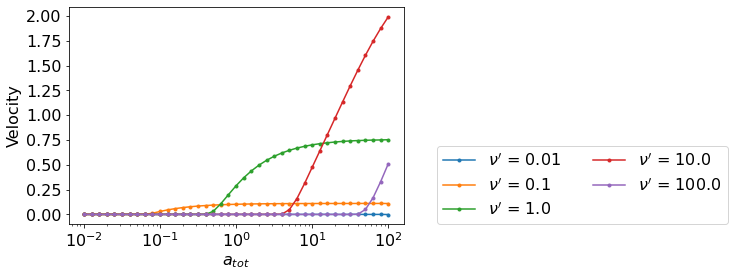

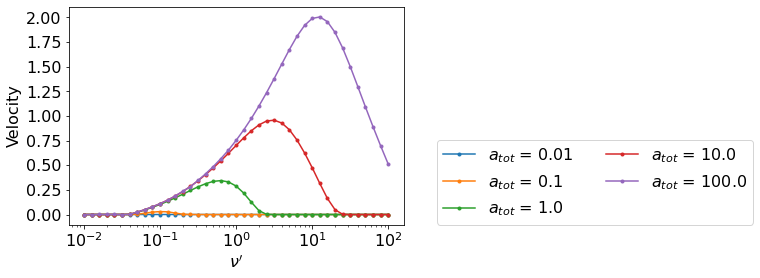

In [11]:
for j in range(0,nu_n,10):
    plot(a0s,vs.T[j],".-", label= r"$\nu'$ = "+ str(round(nus[j],2)))
    xscale("log")
legend(loc = (1.1,0),fontsize = 16, ncol = 2)
xlabel(r"$a_{tot}$", fontsize = 16)
ylabel("Velocity", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
show()
for j in range(0,a0_n,10):
    plot(nus,vs[j],".-", label= r"$a_{tot}$ = "+ str(round(a0s[j],2)))
    xscale("log")
legend(loc = (1.1,0),fontsize = 16, ncol = 2)
xlabel(r"$\nu'$", fontsize = 16)
ylabel("Velocity", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
show()

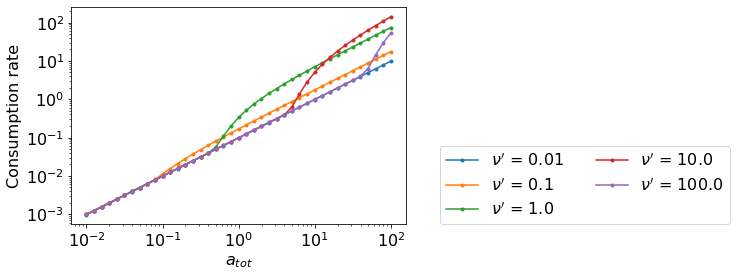

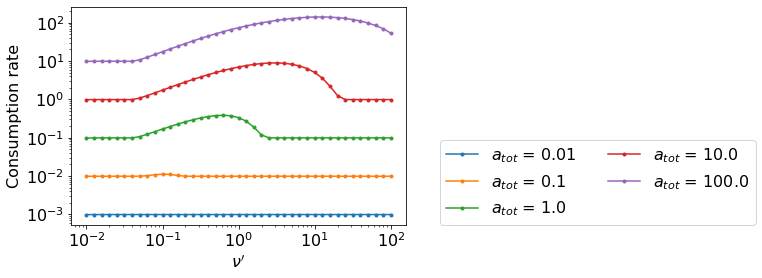

In [8]:

for j in range(0,nu_n,10):
    plot(a0s,burnt.T[j],".-", label= r"$\nu'$ = "+ str(round(nus[j],2)))
    xscale("log")
    yscale("log")
legend(loc = (1.1,0),fontsize = 16, ncol = 2)
xlabel(r"$a_{tot}$", fontsize = 16)
ylabel("Consumption rate", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
show()
for j in range(0,a0_n,10):
    plot(nus,burnt[j],".-", label= r"$a_{tot}$ = "+ str(round(a0s[j],2)))
    xscale("log")
    yscale("log")
legend(loc = (1.1,0),fontsize = 16, ncol = 2)
xlabel(r"$\nu'$", fontsize = 16)
ylabel("Consumption rate", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
show()

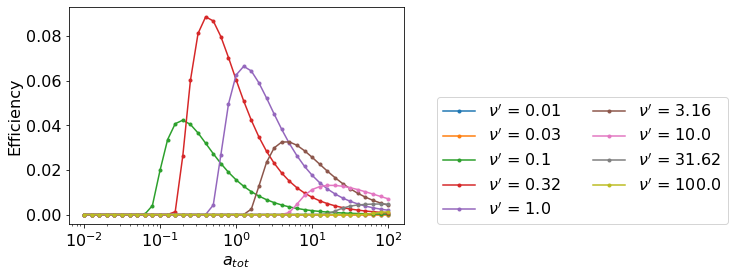

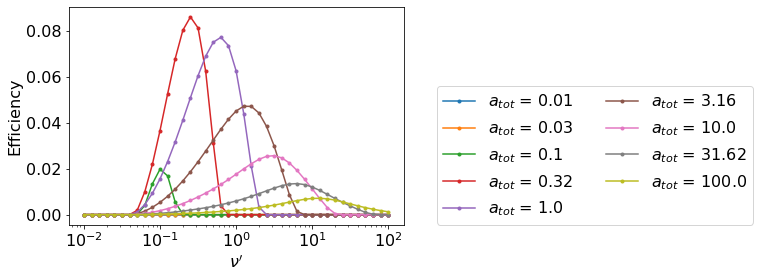

In [13]:
factor = 1/dG
for j in range(0,nu_n,5):
    plot(a0s,factor*vs.T[j]**2/burnt.T[j],".-", label= r"$\nu'$ = "+ str(round(nus[j],2)))
    xscale("log")
legend(loc = (1.1,0),fontsize = 16, ncol = 2)
xlabel(r"$a_{tot}$", fontsize = 16)
ylabel("Efficiency", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
show()
for j in range(0,a0_n,5):
    plot(nus,factor*vs[j]**2/burnt[j],".-", label= r"$a_{tot}$ = "+ str(round(a0s[j],2)))
    xscale("log")
legend(loc = (1.1,0),fontsize = 16, ncol = 2)
xlabel(r"$\nu'$", fontsize = 16)
ylabel("Efficiency", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
show()

In [ ]:
import pandas as pd

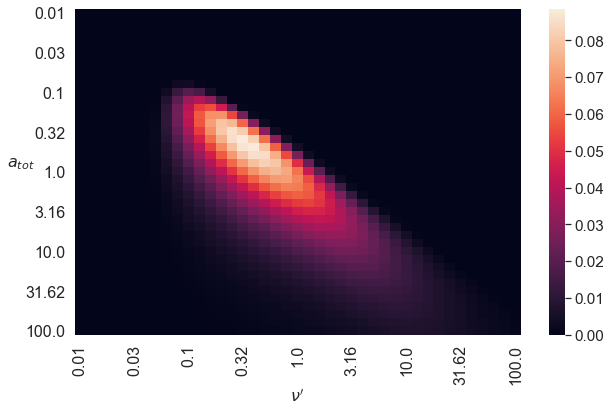

In [21]:
a0stmp = []
for j in range(a0_n):
    if j % 1 == 0:
        a0stmp.append(round(a0s[j],2)) 
    else:
        a0stmp.append("") 
nustmp = []
for j in range(nu_n):
    if j % 1 == 0:
        nustmp.append(round(nus[j],2)) 
    else:
        nustmp.append("")


figure(figsize = (10,6))
sb.set(font_scale=1.4)
df = pd.DataFrame(factor*vs**2/burnt,index = a0stmp,  columns=nustmp)
sb.heatmap(df, xticklabels = 5, yticklabels = 5)
ylabel(r"$a_{tot}$",rotation=0,fontsize = 16)
xlabel(r"$\nu'$",fontsize = 16)
yticks(rotation = 0,fontsize = 16) 
xticks(rotation = 90,fontsize = 16) 
show()